**Задание 1: Векторизация текста с использованием Мешка слов (BoW) и TF-IDF**

1. Создайте корпус из минимум 10 текстовых документов (можно взять новостные статьи, отзывы на товары, статьи по одной тематике).
2. Реализуйте предобработку текста, включающую:
* Приведение к нижнему регистру
* Токенизацию
* Удаление стоп-слов и пунктуации
* Лемматизацию/стемминг
3. Реализуйте модель Мешка слов (BoW) с использованием CountVectorizer из scikit-learn.
4. Реализуйте модель TF-IDF с использованием TfidfVectorizer из scikit-learn.
5. Найдите 10 самых значимых терминов для каждого документа по обоим подходам и сравните результаты.
6. Визуализируйте сходство документов с помощью метрики косинусного расстояния для обоих подходов.
7. Прокомментируйте разницу в результатах между BoW и TF-IDF

In [33]:
import re
import pandas as pd

In [38]:
# ваш код
news = [
    "At least 55 dead and hundreds missing after fire engulfs Hong Kong tower blocks. At least 55 people have been killed in a huge fire that engulfed multiple high-rise buildings in Hong Kong - the city's deadliest blaze in more than 70 years. Some residents remain trapped inside the buildings, with more than 270 people unaccounted for. Hundreds of firefighters have been tackling the blaze, which is now largely under control at all of the affected buildings at Wang Fuk Court. The housing complex had been undergoing extensive renovations when the fire began.",
    "Hostage families confirm identities of three of four bodies handed over by Hamas. Israeli hostage families have confirmed the identities of three of four bodies handed over by Hamas in Gaza on Tuesday. The bodies of Tamir Nimrodi, 20, Eitan Levy, 53, and Uriel Baruch, 35, were part of the latest return, the Hostages Families Forum said. The fourth body does not match any of the known hostages, Israel said. So far seven hostages' bodies are confirmed to have been sent back from Gaza. Hamas has yet to return the other bodies as agreed under a ceasefire deal brokered by the US.",
    "Palestinians celebrate return of detainees freed by Israel. Hundreds of freed Palestinian prisoners and detainees have been welcomed with tears and screams of joy as they were released by Israel to be reunited with their families in Gaza and the occupied West Bank. The release involved about 250 prisoners who had been convicted of crimes including murder and deadly attacks against Israelis - and about 1,700 detainees from Gaza who had been held by Israel without charge. As prisoners exited a Red Cross bus in Ramallah, many draped in traditional Keffiyeh scarves, they looked pale and gaunt, with some struggling to walk.",
    "Trump says Israel and Hamas 'sign off' on first phase of Gaza peace plan. US President Donald Trump has announced that Israel and Hamas have both signed off on the first phase of a peace plan for Gaza. This means that ALL of the Hostages will be released very soon, and Israel will withdraw their Troops to an agreed upon line as the first steps toward a Strong, Durable, and Everlasting Peace, Trump wrote on Truth Social. The announcement comes after three days of indirect talks in Egypt - mediated by officials from Egypt, Qatar, Turkey and the US - aimed at bringing an end to the two-year conflict.",
    "Key US and regional mediators join talks in push to end Gaza war. Top US envoys and regional figures are taking part in the third day of indirect talks between Israel and Hamas in Egypt on President Donald Trump's plan to end the war in Gaza. Steve Witkoff and Trump's son-in-law, Jared Kushner, arrived in Sharm el-Sheikh on Wednesday along with Qatar's prime minister and Turkey's intelligence chief for what is expected to be a key day indicating whether progress can be made. A senior Hamas official told the BBC it had shown the necessary positivity in the negotiations and submitted a list of the Palestinian prisoners it wanted Israel to release in exchange for the hostages held in Gaza.",
    "Macron should step down early and call presidential vote, says his first PM. Emmanuel Macron should name a prime minister to push through a budget and then call early presidential elections to solve France's political crisis, his first prime minister has said. Édouard Philippe's comments come after France's third prime minister in a year, Sébastien Lecornu, resigned on Monday after his bid to form a government fell apart. Macron has asked him to make a last-ditch plan for stability by the end of Wednesday - but support for the French president appears to be waning even among his allies. ",
    "India wants to lure its best minds back from the US - but it won't be easy. US President Donald Trump's abrupt decision to hike H-1B visa fees to $100,000 has prompted policymakers in Delhi to woo skilled Indians back home. A bureaucrat, who works closely with Prime Minister Narendra Modi, recently said that the government was actively encouraging overseas Indians to return and contribute to nation-building. Yet, another member of the PM's economic advisory council told a media conclave that H-1B visas have always served the interests of the host nation, and so the hike in fee boded well for India's ability to attract global talent. The crux of these arguments is that the time is ripe for India to engineer a reverse brain drain and lure some of the world's most talented professionals in technology, medicine and other innovative industries, who'd left the country in the past 30 years, back to the homeland.",
    "Sanctions reimposed on Iran 10 years after landmark nuclear deal. Sweeping UN economic and military sanctions have been reimposed on Iran - 10 years after they were lifted in a landmark international deal over its nuclear programme. The new measures took effect as the three European partners to the deal - the UK, France and Germany - activated the so-called snapback mechanism, accusing Iran of continued nuclear escalation and lack of co-operation. Iran suspended inspections of its nuclear facilities - a legal obligation under the terms of the 2015 deal - after Israel and the US bombed several of its nuclear sites and military bases in June. ",
    "Trump suggests Starmer could use military to control UK borders. Donald Trump suggested Prime Minister Sir Keir Starmer could use the military to stop illegal migration at a news conference marking the end of the US president's second state visit to the UK. Trump said he discussed migration issues with Sir Keir during a meeting at his country residence Chequers. The US president talked about his policies to secure borders in the US and said the UK faced a similar challenge with migrants crossing the English Channel in small boats.",
    "Trump's 50% tariff on India kicks in as Modi urges self-reliance. Donald Trump's steep 50% tariffs on India have kicked in, weeks after the US president issued an executive order hitting the Asian country with an additional 25% penalty over its purchases of Russian oil and weapons. This makes India - one of the US's strongest partners in the Indo-Pacific - among the countries paying the highest tariffs in the world. This could deal a blow to exports and growth in the world's fifth largest economy, given that the US was, until recently, India's largest trading partner."
]


In [41]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 73.1 MB/s eta 0:00:00


In [42]:
import string
import re
import nltk
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec

nltk.download('punkt_tab')

# Загрузка моделей spaCy
nlp_en = spacy.load("en_core_web_sm")

# Загрузка стоп-слов
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
# Предобработка текста
def normalize_text(text):
  normal_text = []
  for sentence in text:
      sentence = sentence.lower()
      sentence = re.sub(r'[^\w\s]', ' ', sentence)
      sentence = sentence.replace("  ", " ")
      tokens = sentence.split()
      filtered_tokens = [token for token in tokens if token not in english_stopwords]
      sentence = ' '.join(filtered_tokens)
      # Лемматизация
      doc = nlp_en(sentence)
      lemmas = [token.lemma_ for token in doc if token.is_alpha]
      sentence = ' '.join(lemmas)
      normal_text.append(sentence)
  return normal_text
documents = normalize_text(news)
print(documents)

  # Вывод предобработанных документов
print("Предобработанные документы:")
for i, doc in enumerate(documents, 1):
    print(f"Документ {i}: {doc}")

['least dead hundred miss fire engulfs hong kong tower block least people kill huge fire engulf multiple high rise building hong kong city deadly blaze year resident remain trapped inside building people unaccounte hundreds firefighter tackle blaze largely control affect building wang fuk court housing complex undergo extensive renovation fire begin', 'hostage family confirm identity three four body hand hamas israeli hostage family confirm identity three four body hand hamas gaza tuesday body tamir nimrodi eitan levy uriel baruch part late return hostage family forum say fourth body match know hostage israel say far seven hostage body confirm send back gaza hamas yet return body agree ceasefire deal broker we', 'palestinians celebrate return detainee free israel hundred free palestinian prisoner detainee welcome tear scream joy release israel reunite family gaza occupy west bank release involve prisoner convict crime include murder deadly attack israelis detainee gaza hold israel with

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# Модель мешка слов
# Создание векторизатора
count_vectorizer = CountVectorizer()

# Обучение векторизатора и преобразование документов
bow_matrix = count_vectorizer.fit_transform(documents)

# Получение списка фичей (слов)
feature_names = count_vectorizer.get_feature_names_out()

# Преобразование разреженной матрицы в плотную для наглядности
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=feature_names,
    index=[f'Документ {i+1}' for i in range(len(documents))]
)

# Вывод матрицы Bag of Words
print("Матрица Bag of Words:")
print(bow_df)

Матрица Bag of Words:
             ability  abrupt  accuse  activate  actively  additional  \
Документ 1         0       0       0         0         0           0   
Документ 2         0       0       0         0         0           0   
Документ 3         0       0       0         0         0           0   
Документ 4         0       0       0         0         0           0   
Документ 5         0       0       0         0         0           0   
Документ 6         0       0       0         0         0           0   
Документ 7         1       1       0         0         1           0   
Документ 8         0       0       1         1         0           0   
Документ 9         0       0       0         0         0           0   
Документ 10        0       0       0         0         0           1   

             advisory  affect  agree  aim  ...  withdraw  without  witkoff  \
Документ 1          0       1      0    0  ...         0        0        0   
Документ 2          0       0

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer # Для создания TF-IDF

In [11]:
# Модель TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Обучение векторизатора и преобразование документов
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Преобразование в DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=[f'Документ {i+1}' for i in range(len(documents))]
)

# Вывод матрицы TF-IDF
print("Матрица TF-IDF:")
print(tfidf_df)


Матрица TF-IDF:
              ability    abrupt   accuse  activate  actively  additional  \
Документ 1   0.000000  0.000000  0.00000   0.00000  0.000000    0.000000   
Документ 2   0.000000  0.000000  0.00000   0.00000  0.000000    0.000000   
Документ 3   0.000000  0.000000  0.00000   0.00000  0.000000    0.000000   
Документ 4   0.000000  0.000000  0.00000   0.00000  0.000000    0.000000   
Документ 5   0.000000  0.000000  0.00000   0.00000  0.000000    0.000000   
Документ 6   0.000000  0.000000  0.00000   0.00000  0.000000    0.000000   
Документ 7   0.099344  0.099344  0.00000   0.00000  0.099344    0.000000   
Документ 8   0.000000  0.000000  0.09917   0.09917  0.000000    0.000000   
Документ 9   0.000000  0.000000  0.00000   0.00000  0.000000    0.000000   
Документ 10  0.000000  0.000000  0.00000   0.00000  0.000000    0.117467   

             advisory    affect     agree       aim  ...  withdraw   without  \
Документ 1   0.000000  0.120607  0.000000  0.000000  ...  0.000000 

In [12]:
bow_sum = np.sum(bow_matrix.toarray(), axis=0)


word_bow_dict = dict(zip(feature_names, bow_sum))

top_bow_words = sorted(word_bow_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("=== Топ-10 слов по всей коллекции ===\n")
print("Топ-10 слов по BOW (самые частые в коллекции):")
for word, count in top_bow_words:
    print(f"- {word}: {count} раз")

tfidf_sum = np.sum(tfidf_matrix.toarray(), axis=0)

word_tfidf_dict = dict(zip(feature_names, tfidf_sum))

top_tfidf_words = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nТоп-10 слов по TF-IDF (с наибольшим весом по всей коллекции):")
for word, score in top_tfidf_words:
    print(f"- {word}: {score:.4f}")

print("\nСравнение топ-10 слов:")
bow_words = [word for word, _ in top_bow_words]
tfidf_words = [word for word, _ in top_tfidf_words]

common_words = set(bow_words) & set(tfidf_words)
bow_only = set(bow_words) - common_words
tfidf_only = set(tfidf_words) - common_words

if common_words:
    print(f"Общие слова в обоих топ-10: {', '.join(common_words)}")
if bow_only:
    print(f"Только в BOW топ-10: {', '.join(bow_only)}")
if tfidf_only:
    print(f"Только в TF-IDF топ-10: {', '.join(tfidf_only)}")


=== Топ-10 слов по всей коллекции ===

Топ-10 слов по BOW (самые частые в коллекции):
- trump: 11 раз
- israel: 10 раз
- gaza: 9 раз
- say: 8 раз
- us: 8 раз
- hamas: 7 раз
- hostage: 7 раз
- india: 7 раз
- president: 7 раз
- body: 6 раз

Топ-10 слов по TF-IDF (с наибольшим весом по всей коллекции):
- trump: 0.7571
- israel: 0.6892
- gaza: 0.6793
- india: 0.6528
- body: 0.5670
- hamas: 0.5627
- us: 0.5354
- hostage: 0.5273
- say: 0.5202
- first: 0.5074

Сравнение топ-10 слов:
Общие слова в обоих топ-10: israel, gaza, trump, hostage, india, body, say, hamas, us
Только в BOW топ-10: president
Только в TF-IDF топ-10: first


In [45]:
# Функция для предобработки текста
def preprocess_text(text):
    """Функция для базовой обработки текста"""
    # Преобразуем в нижний регистр
    text = text.lower()

    # Удаляем пунктуацию (оставляем только буквы и пробелы)
    text = re.sub(r'[^\w\s]', '', text)

    # Токенизация (разбиение на слова)
    tokens = word_tokenize(text)

    return tokens

# Предобрабатываем каждое предложение в корпусе
processed_corpus = [preprocess_text(sentence) for sentence in documents]

In [46]:
model = Word2Vec(
    sentences=processed_corpus,  # Наш корпус предложений
    vector_size=100,  # Размерность векторов (обычно от 100 до 300)
    window=5,  # Размер контекстного окна (сколько слов слева и справа учитывать)
    min_count=1,  # Минимальная частота слова для включения в модель (здесь 1, т.к. у нас маленький корпус)
    sg=1,  # 1 = Skip-gram, 0 = CBOW
    hs=0,  # 0 = использовать negative sampling, 1 = иерархический softmax
    negative=5,  # Количество "негативных" семплов для negative sampling
    ns_exponent=0.75,  # Экспонента для отрицательного сэмплирования
    cbow_mean=1,  # Для CBOW: 1 = использовать среднее, 0 = сумму
    alpha=0.025,  # Начальная скорость обучения
    min_alpha=0.0001,  # Минимальная скорость обучения
    seed=42,  # Для воспроизводимости результатов
    workers=4,  # Количество потоков для параллельного обучения
)

In [47]:
def sentence_to_vector(sentence, model):
    """
    Преобразует предложение в вектор, усредняя векторы слов

    Args:
        sentence: Исходное предложение
        model: Word2Vec

    Returns:
        Вектор предложения
    """
    # Предобрабатываем предложение
    words = preprocess_text(sentence)

    # Отбираем только слова, которые есть в модели
    words = [word for word in words if word in model.wv]

    if not words:
        # Если не нашлось ни одного известного слова, вернем нулевой вектор
        return np.zeros(model.vector_size)

    # Получаем векторы слов
    word_vectors = [model.wv[word] for word in words]

    # Возвращаем средний вектор
    return np.mean(word_vectors, axis=0)

# Создаем векторные представления для всех предложений корпуса
sentence_vectors = [sentence_to_vector(sentence, model) for sentence in documents]

def find_similar_sentences(query, corpus, model, top_n=10):
    # Преобразуем запрос в вектор
    query_vector = sentence_to_vector(query, model)
    query_norm = np.linalg.norm(query_vector)
    if query_norm == 0:
    # В запросе не оказалось слов из словаря модели
        return []

    similarities = []
    for i, sentence_vector in enumerate(sentence_vectors):
        denom = query_norm * np.linalg.norm(sentence_vector)
        if denom == 0:
            similarity = 0.0
        else:
            similarity = float(np.dot(query_vector, sentence_vector) / denom)

        similarities.append((documents[i], similarity))

    # Сортируем по убыванию сходства
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Возвращаем top_n результатов
    return similarities[:top_n]

print("\n=== Поиск похожих предложений ===")
for query in news:
    # Чтобы запрос не был слишком громозким
    tokens = query.split()
    query = " ".join(tokens)
    print(f"\nЗапрос: {query}")
    similar = find_similar_sentences(query, documents, model)
    for i, (sentence, score) in enumerate(similar, 1):
        print(f"{i}. {sentence[:20]} (сходство: {score:.4f})")


=== Поиск похожих предложений ===

Запрос: At least 55 dead and hundreds missing after fire engulfs Hong Kong tower blocks. At least 55 people have been killed in a huge fire that engulfed multiple high-rise buildings in Hong Kong - the city's deadliest blaze in more than 70 years. Some residents remain trapped inside the buildings, with more than 270 people unaccounted for. Hundreds of firefighters have been tackling the blaze, which is now largely under control at all of the affected buildings at Wang Fuk Court. The housing complex had been undergoing extensive renovations when the fire began.
1. least dead hundred m (сходство: 0.7981)
2. trump suggest starme (сходство: 0.3822)
3. macron step early ca (сходство: 0.3439)
4. india want lure good (сходство: 0.3264)
5. key us regional medi (сходство: 0.2714)
6. sanction reimpose ir (сходство: 0.2640)
7. trump tariff india k (сходство: 0.2363)
8. trump say israel ham (сходство: 0.1721)
9. hostage family confi (сходство: 0.1442)
10. pales

In [59]:
docs_clean = [" ".join(preprocess_text(d)) for d in documents]
labels = [f"Док {i+1}" for i in range(len(docs_clean))]


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bow = CountVectorizer()
X_bow = bow.fit_transform(docs_clean)

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(docs_clean)


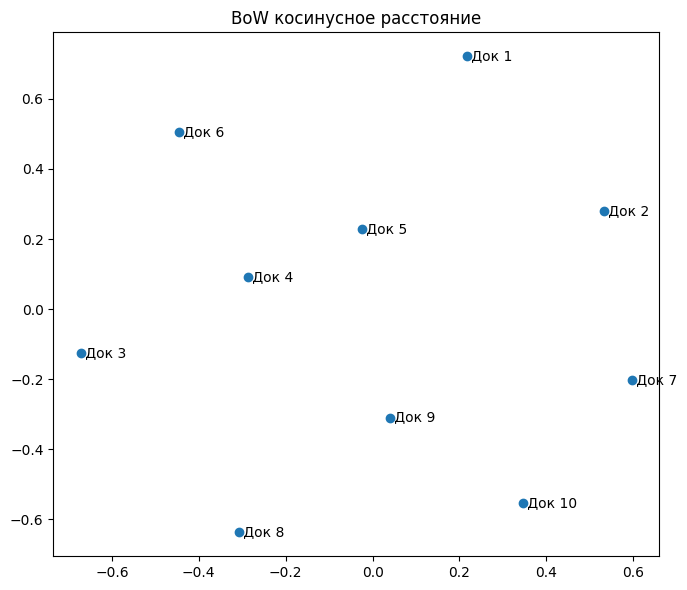

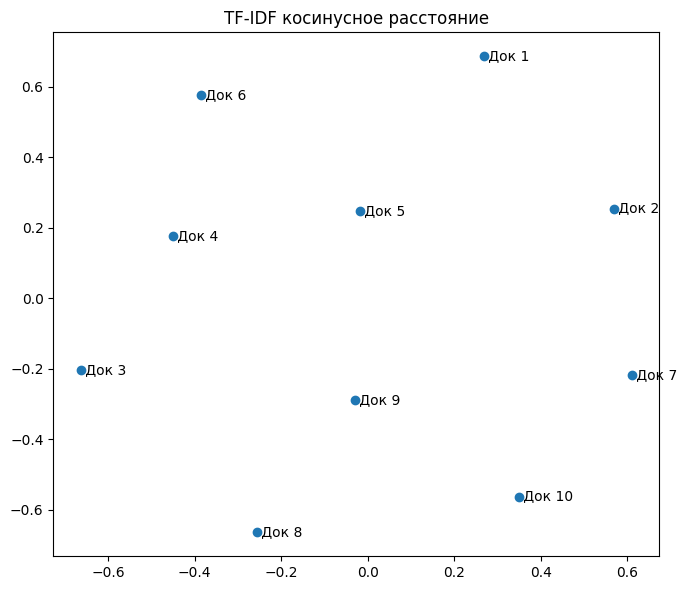

In [60]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_distances

def plot_mds(X, labels, title):
    D = cosine_distances(X)
    coords = MDS(n_components=2, dissimilarity="precomputed", random_state=42).fit_transform(D)

    plt.figure(figsize=(7,6))
    plt.scatter(coords[:,0], coords[:,1])
    for i, lab in enumerate(labels):
        plt.text(coords[i,0], coords[i,1], " " + lab, va="center")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_mds(X_bow, labels, "BoW косинусное расстояние")
plot_mds(X_tfidf, labels, "TF-IDF косинусное расстояние")

Разница между BoW и TF-IDF почти нет. Связано это с тем, что слова в документах почти не повторялись и оба метода не смогли на полную проявить себя и выделиться на фоне друг друга.

**Задание 2: Морфологическая разметка текста**

1. Возьмите отрывок текста (минимум 300 слов) на русском и английском языке.
2. Для русского языка используйте PyMorphy2 или PyMorphy3, для английского - NLTK или SpaCy для проведения морфологического анализа.
3. Выполните следующие операции:
* Определите части речи для каждого слова в тексте
* Для существительных определите падеж, род и число
* Для глаголов определите время, лицо и число
* Создайте частотный словарь частей речи в тексте
4. Разработайте функцию, которая будет автоматически изменять текст, заменяя все существительные на их форму множественного числа (где возможно).
5. Результаты морфологического анализа должны быть представлены в виде таблицы.
6. Оцените и прокомментируйте точность определения морфологических характеристик

In [2]:
# ваш код
russian_text = """Три девицы под окном Пряли поздно вечерком. «Кабы я была царица, — Говорит одна девица, — То на весь крещеный мир Приготовила б я пир». «Кабы я была царица, — Говорит ее сестрица, — То на весь бы мир одна Наткала я полотна». «Кабы я была царица, —
Третья молвила сестрица, — Я б для батюшки-царя Родила богатыря». Только вымолвить успела, Дверь тихонько заскрыпела, И в светлицу входит царь, Стороны той государь. Во всё время разговора Он стоял позадь забора; Речь последней по всему Полюбилася ему. «Здравствуй, красная девица, —
Говорит он, — будь царица И роди богатыря Мне к исходу сентября. Вы ж, голубушки-сестрицы, Выбирайтесь из светлицы, Поезжайте вслед за мной, Вслед за мной и за сестрой: Будь одна из вас ткачиха, А другая повариха». В сени вышел царь-отец. Все пустились во дворец.
Царь недолго собирался: В тот же вечер обвенчался. Царь Салтан за пир честной Сел с царицей молодой; А потом честные гости На кровать слоновой кости Положили молодых И оставили одних. В кухне злится повариха, Плачет у станка ткачиха, И завидуют оне Государевой жене. А царица молодая,
Дела вдаль не отлагая, С первой ночи понесла. В те поры война была. Царь Салтан, с женой простяся, На добра-коня садяся, Ей наказывал себя Поберечь, его любя. Между тем, как он далёко Бьется долго и жестоко, Наступает срок родин; Сына бог им дал в аршин, И царица над ребенком Как орлица над орленком;
Шлет с письмом она гонца, Чтоб обрадовать отца. А ткачиха с поварихой, С сватьей бабой Бабарихой, Извести ее хотят, Перенять гонца велят; Сами шлют гонца другого Вот с чем от слова до слова: «Родила царица в ночь Не то сына, не то дочь; Не мышонка, не лягушку, А неведому зверюшку». Как услышал царь-отец,
Что донес ему гонец, В гневе начал он чудесить И гонца хотел повесить; Но, смягчившись на сей раз, Дал гонцу такой приказ: «Ждать царева возвращенья Для законного решенья». Едет с грамотой гонец, И приехал наконец. А ткачиха с поварихой, С сватьей бабой Бабарихой, Обобрать его велят; Допьяна гонца поят
И в суму его пустую Суют грамоту другую — И привез гонец хмельной В тот же день приказ такой: «Царь велит своим боярам, Времени не тратя даром, И царицу и приплод Тайно бросить в бездну вод». Делать нечего: бояре, Потужив о государе И царице молодой, В спальню к ней пришли толпой. Объявили царску волю —
Ей и сыну злую долю, Прочитали вслух указ, И царицу в тот же час В бочку с сыном посадили, Засмолили, покатили И пустили в Окиян — Так велел-де царь Салтан."""

english_text = """The poems included in this volume consist of thirteen longer or more important works, written at various periods between June, 1816, and October, 1821; of eight occasional pieces (Poems of July-September, 1816), written in 1816; and of another collection of occasional pieces (Poems 1816-1823),
written at intervals between November, 1816, and September, 1823. Of this second group of minor poems five are now printed and published for the first time.
The volume is not co-extensive with the work of the period. The third and fourth cantos of Childe Harold (1816-1817), the first five cantos of Don Juan (1818, 1819, 1820), Sardanapalus, The Two Foscari, Cain, and Heaven and Earth (1821), form parts of other volumes, but, in spite of these notable exceptions,
 the fourth volume contains the work of the poet's maturity, which is and must ever remain famous. Byron was not content [vi]to write on one kind of subject, or to confine himself to one branch or species of poetry. He tracked the footsteps now of this master poet, now of another, far outstripping some of his models; soon
 spent in the pursuit of others. Even in his own lifetime, and in the heyday of his fame, his friendliest critics, who applauded him to the echo, perceived that the "manifold motions" of his versatile and unsleeping talent were not always sanctioned or blessed by his genius. Hence the unevenness of his work, the different values of
 this or that poem. But, even so, in width of compass, in variety of style, and in measure of success, his achievement was unparalleled. Take such poems as Manfred or Mazeppa, which have left their mark on the literature of Europe; as Beppo, the avant courrier of Don Juan, or the "inimitable" Vision of Judgment, which the "hungry
 generations" have not trodden down or despoiled of its freshness. Not one of these poems suggests or resembles the other, but each has its crowd of associations, a history and almost a literature of its own."""

In [6]:
!pip install nltk spacy
!pip install inflect
!pip install pymorphy3

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
from nltk.tokenize.treebank import TreebankWordDetokenizer
import nltk
import string
import pymorphy3
import inflect
nltk.download('punkt')
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')

import spacy
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 67.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [7]:
import re
# Определение частей речи в русском тексте
morph = pymorphy3.MorphAnalyzer()
text_tokens_rus = re.findall(r'\b[а-яА-ЯёЁ]+\b', russian_text.lower())
rus_list_of_tagged = []
pos_counts = Counter()

for word in text_tokens_rus:
    parses = morph.parse(word)
    if not parses or parses[0].tag.POS is None:
        continue
    best_parse = parses[0]
    pos = best_parse.tag.POS
    _case = best_parse.tag.case
    gender = best_parse.tag.gender
    number = best_parse.tag.number
    person = best_parse.tag.person
    tense = best_parse.tag.tense
    if pos == 'NOUN':
        rus_list_of_tagged.append(f'{word}_{pos}_{_case}_{gender}_{number}')
    elif pos == 'VERB' or pos == 'INFN' or pos == 'GRND' or pos == 'PRTF' or pos == 'PRTS':
        rus_list_of_tagged.append(f'{word}_{pos}_{tense}_{person}_{number}')
    else:
        rus_list_of_tagged.append(f'{word}_{pos}')
    pos_counts[pos] += 1

print(rus_list_of_tagged)
print("\n--- Частотный словарь частей речи в  русском тексте ---")
for pos, count in pos_counts.most_common():
    print(f"{pos}: {count}")

['три_NUMR', 'девицы_NOUN_nomn_femn_plur', 'под_PREP', 'окном_NOUN_ablt_neut_sing', 'пряли_VERB_past_None_plur', 'поздно_ADVB', 'вечерком_ADVB', 'кабы_CONJ', 'я_NPRO', 'была_VERB_past_None_sing', 'царица_NOUN_nomn_femn_sing', 'говорит_VERB_pres_3per_sing', 'одна_ADJF', 'девица_NOUN_nomn_femn_sing', 'то_CONJ', 'на_PREP', 'весь_ADJF', 'крещеный_ADJF', 'мир_NOUN_nomn_masc_sing', 'приготовила_VERB_past_None_sing', 'б_PRCL', 'я_NPRO', 'пир_NOUN_nomn_masc_sing', 'кабы_CONJ', 'я_NPRO', 'была_VERB_past_None_sing', 'царица_NOUN_nomn_femn_sing', 'говорит_VERB_pres_3per_sing', 'ее_NPRO', 'сестрица_NOUN_nomn_femn_sing', 'то_CONJ', 'на_PREP', 'весь_ADJF', 'бы_PRCL', 'мир_NOUN_nomn_masc_sing', 'одна_ADJF', 'наткала_VERB_past_None_sing', 'я_NPRO', 'полотна_NOUN_gent_neut_sing', 'кабы_CONJ', 'я_NPRO', 'была_VERB_past_None_sing', 'царица_NOUN_nomn_femn_sing', 'третья_ADJF', 'молвила_VERB_past_None_sing', 'сестрица_NOUN_nomn_femn_sing', 'я_NPRO', 'б_PRCL', 'для_PREP', 'батюшки_NOUN_gent_masc_sing', 'цар

In [11]:
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
# Определение частей речи в английском тексте
text_tokens_eng = word_tokenize(english_text)
tagged = nltk.pos_tag(text_tokens_eng)
list_of_tagged = []

for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)
# Словарь частей речи
text_tokens_eng = [t for t in text_tokens_eng if re.search(r"[A-Za-z0-9]", t)]
tagged = pos_tag(text_tokens_eng)
print("\n--- Частотный словарь частей речи в  английском тексте ---")
pos_counts_eng = Counter(tag for _, tag in tagged)
for pos, count in pos_counts_eng.most_common():
    print(f"{pos}: {count}")

['The_DT', 'poems_NN', 'included_VBD', 'in_IN', 'this_DT', 'volume_NN', 'consist_NN', 'of_IN', 'thirteen_JJ', 'longer_JJR', 'or_CC', 'more_RBR', 'important_JJ', 'works_NNS', ',_,', 'written_VBN', 'at_IN', 'various_JJ', 'periods_NNS', 'between_IN', 'June_NNP', ',_,', '1816_CD', ',_,', 'and_CC', 'October_NNP', ',_,', '1821_CD', ';_:', 'of_IN', 'eight_CD', 'occasional_JJ', 'pieces_NNS', '(_(', 'Poems_NNPS', 'of_IN', 'July-September_NNP', ',_,', '1816_CD', ')_)', ',_,', 'written_VBN', 'in_IN', '1816_CD', ';_:', 'and_CC', 'of_IN', 'another_DT', 'collection_NN', 'of_IN', 'occasional_JJ', 'pieces_NNS', '(_(', 'Poems_NNP', '1816-1823_CD', ')_)', ',_,', 'written_VBN', 'at_IN', 'intervals_NNS', 'between_IN', 'November_NNP', ',_,', '1816_CD', ',_,', 'and_CC', 'September_NNP', ',_,', '1823_CD', '._.', 'Of_IN', 'this_DT', 'second_JJ', 'group_NN', 'of_IN', 'minor_JJ', 'poems_NNS', 'five_CD', 'are_VBP', 'now_RB', 'printed_VBN', 'and_CC', 'published_VBN', 'for_IN', 'the_DT', 'first_JJ', 'time_NN', '._

In [42]:
# Меняем ед число существетильных на множетсвенное число в английском тексте
p = inflect.engine()
nlp = spacy.load("en_core_web_sm")

def pluralize_nouns_spacy(text: str) -> str:
    doc = nlp(text)
    out = []
    for tok in doc:
        if tok.tag_ in ("NN", "NNP"):
            pl = p.plural_noun(tok.text) or p.plural(tok.text)
            out.append(pl + tok.whitespace_)
        else:
            out.append(tok.text_with_ws)

    return "".join(out)

print(pluralize_nouns_spacy(english_text))


The poems included in this volumes consist of thirteen longer or more important works, written at various periods between Junes, 1816, and Octobers, 1821; of eight occasional pieces (Poems of Julys-Septembers, 1816), written in 1816; and of another collections of occasional pieces (Poems 1816-1823), 
written at intervals between Novembers, 1816, and Septembers, 1823. Of this second groups of minor poems five are now printed and published for the first times.
The volumes is not co-extensive with the works of the periods. The third and fourth cantos of Childes Harolds (1816-1817), the first five cantos of Dons Juans (1818, 1819, 1820), Sardanapaluses, The Twoes Foscaris, Cains, and Heavens and Earths (1821), forms parts of other volumes, but, in spites of these notable exceptions,
 the fourth volumes contains the works of the poets's maturities, which is and must ever remain famous. Byrons was not content [vi]toes write on one kinds of subjects, or to confine himself to one branches or s

In [31]:
def pluralize_russian_nouns(text):
    tokens = re.findall(r'(\b[а-яА-ЯёЁ]+\b|[^\s])', text)
    pluralized_words = []
    for token in tokens:
        if re.match(r'\b[а-яА-ЯёЁ]+\b', token):
            parsed_word = morph.parse(token.lower())[0]
            if 'NOUN' in parsed_word.tag:
                plural_form = parsed_word.inflect({'plur', parsed_word.tag.case})
                if plural_form:
                    if token[0].isupper():
                        pluralized_words.append(plural_form.word.capitalize())
                    else:
                        pluralized_words.append(plural_form.word)
                else:
                    pluralized_words.append(token)
            else:
                pluralized_words.append(token)
        else:
            pluralized_words.append(token)
    reconstructed_text = []
    for i, word in enumerate(pluralized_words):
        reconstructed_text.append(word)
        if i < len(pluralized_words) - 1 and (re.match(r'\b[а-яА-ЯёЁ]+\b', word) and re.match(r'\b[а-яА-ЯёЁ]+\b', pluralized_words[i+1])):
            reconstructed_text.append(' ')

    return "".join(reconstructed_text)

pluralized_russian_text = pluralize_russian_nouns(russian_text)
print(pluralized_russian_text)

Три девицы под окнами Пряли поздно вечерком.«Кабы я была царицы,—Говорит одна девицы,—То на весь крещеный миры Приготовила б я пиры».«Кабы я была царицы,—Говорит ее сестрицы,—То на весь бы миры одна Наткала я полотен».«Кабы я была царицы,—Третья молвила сестрицы,—Я б для батюшек-царей Родила богатырей».Только вымолвить успела,Двери тихонько заскрыпела,И в светлицы входит цари,Сторон той государи.Во всё времена разговоров Он стоял позадь заборов;Речи последней по всему Полюбиласи ему.«Здравствуй,красная девицы,—Говорит он,—будь царицы И родь богатырей Мне к исходам сентябрей.Вы ж,голубушек-сестриц,Выбирайтесь из светлиц,Поезжайте вслед за мной,Вслед за мной и за сёстрами:Будь одна из вас ткачихи,А другая поварихи».В сени вышел цари-отцы.Все пустились во дворцы.Цари недолго собирался:В тот же вечера обвенчался.Цари Салтан за пиры честной Сел с царицами молодой;А потом честные гости На кровати слоновой кости Положили молодых И оставили одних.В кухнях злится поварихи,Плачет у станков ткачи

In [58]:
# Таблица разметки ENG
eng_tokens = word_tokenize(english_text)
eng_tagged = nltk.pos_tag(eng_tokens)  # список (token, tag)

eng_df = pd.DataFrame(eng_tagged, columns=["token", "pos_tag"])


# Таблица разметки RUS
morph = pymorphy3.MorphAnalyzer()
rus_tokens = word_tokenize(russian_text)

rus_rows = []
for word in rus_tokens:
    # Skip non-alphanumeric tokens, but keep 'ё' and 'Ё'
    if not any(char.isalnum() or char in 'ёЁ' for char in word):
        continue

    p = morph.parse(word)[0]
    # Ensure pos is a string, not a GrammemeTag object
    pos = str(p.tag.POS) if p.tag.POS else "UNKN"

    row = {
        "token": word,
        "pos_tag": pos,
        "case": str(p.tag.case) if p.tag.case else '', # Convert to string, use empty string if None
        "gender": str(p.tag.gender) if p.tag.gender else '', # Convert to string, use empty string if None
        "number": str(p.tag.number) if p.tag.number else '', # Convert to string, use empty string if None
        "person": str(p.tag.person) if p.tag.person else '', # Convert to string, use empty string if None
        "tense": str(p.tag.tense) if p.tag.tense else '',   # Convert to string, use empty string if None
    }
    rus_rows.append(row)

rus_df = pd.DataFrame(rus_rows)
# 3) Таблицы частот POS
eng_tokens_np = [t for t in word_tokenize(english_text) if re.search(r"[A-Za-z0-9]", t)]
eng_pos_counts = Counter(tag for _, tag in pos_tag(eng_tokens_np))
eng_freq_df = pd.DataFrame(eng_pos_counts.most_common(), columns=["pos_tag", "count"])

rus_pos_counts = Counter()
for word in rus_tokens:
    if not any(char.isalnum() or char in 'ёЁ' for char in word):
        continue
    pos = str(morph.parse(word)[0].tag.POS) if morph.parse(word)[0].tag.POS else "UNKN"
    rus_pos_counts[pos] += 1

rus_freq_df = pd.DataFrame(rus_pos_counts.most_common(), columns=["pos_tag", "count"])


# Таблицы

print("RUS tagged table:")
print(rus_df.to_markdown(index=False))
print("\nENG tagged table:")
print(eng_df.to_markdown(index=False))
print("\nRUS POS frequency:")
print(rus_freq_df.to_markdown(index=False))
print("\nENG POS frequency:")
print(eng_freq_df.to_markdown(index=False))

RUS tagged table:
| token              | pos_tag   | case   | gender   | number   | person   | tense   |
|:-------------------|:----------|:-------|:---------|:---------|:---------|:--------|
| Три                | NUMR      | accs   |          |          |          |         |
| девицы             | NOUN      | nomn   | femn     | plur     |          |         |
| под                | PREP      |        |          |          |          |         |
| окном              | NOUN      | ablt   | neut     | sing     |          |         |
| Пряли              | VERB      |        |          | plur     |          | past    |
| поздно             | ADVB      |        |          |          |          |         |
| вечерком           | ADVB      |        |          |          |          |         |
| Кабы               | CONJ      |        |          |          |          |         |
| я                  | NPRO      | nomn   |          | sing     | 1per     |         |
| была               | VE

SpaCy отлично проявил себя на английском языке, с его помощью очень просто токенизировать и тегировать. Он справился с английским языокм и верно определил морфологические особенности английскхих слов.
pymorphy3 предоставил подробную информацию о словоформах в русском языке и точно определил морфологические характеристики слов.
Тяжелее было рабоать с pymorphy так, как приходилась читать документацию

**Задание 3: Синтаксический анализ предложений**

1. Возьмите 2 простых и 3 сложных предложений на русском и английском языке (всего 10 предложений).
2. Используйте SpaCy для построения синтаксических деревьев этих предложений.
3. Для каждого предложения:
* Визуализируйте синтаксическое дерево
* Выделите все подлежащие и сказуемые
* Найдите все пары слов, связанные отношением определения (прилагательное-существительное)
4. Разработайте функцию для извлечения всех объектных и субъектных отношений из предложения в формате (субъект, предикат, объект).
5. Объясните, какие трудности возникают при синтаксическом анализе сложных предложений

In [61]:
!python -m spacy download ru_core_news_md
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 25.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 29.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [135]:
russian_sentences = [
    "Он забрал деньги.",
    "Вчера я улетел в Канаду.",
    "Птицы поют, ветер дует, а я сижу.",
    "Утро придет, когда солнце встанет.",
    "Ваня молчал, но внутри него бушевала страшная гроза."
]
english_sentences = [
    "Old tv is working.",
    "Today is my day off.",
    "I missed the part where that is my problem",
    "If he leaves, I leave too.",
    "John fell asleep and Mary got mad."
]

In [63]:
nlp_ru = spacy.load("ru_core_news_md")
nlp_en = spacy.load("en_core_web_md")
from spacy import displacy

In [136]:
# Визуализация дерева зависимостей для русского языка
print('Визуализация дерева зависимостей для русского языка\n')
for sentence in russian_sentences:
    doc_ru = nlp_ru(sentence)

    print(f"Предложение {russian_sentences.index(sentence) + 1}")
    displacy.render(doc_ru, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Визуализация дерева зависимостей для русского языка

Предложение 1


Предложение 2


Предложение 3


Предложение 4


Предложение 5


In [129]:
# Визуализация дерева зависимостей для английского языка
for sentence in english_sentences:
    doc_en = nlp_en(sentence)
    print(f"Sentence {english_sentences.index(sentence) + 1}")
    displacy.render(doc_en, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Sentence 1


Sentence 2


Sentence 3


Sentence 4


Sentence 5


In [123]:
def find_subj_pred_rus(doc):
    root = None
    pred_tokens = []

    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break

    if not root:
        return [], []

    changed = True
    while changed:
        changed = False
        for t in doc:
            if t.dep_ == "conj" and t.head in pred_tokens and t.pos_ in {"VERB", "AUX"}:
                if t not in pred_tokens:
                    pred_tokens.append(t)
                    changed = True

    def pred_text(p):
        parts = {p}
        for ch in p.children:
            if ch.dep_ in {"aux", "auxpass", "cop", "neg"}:
                parts.add(ch)
            if ch.dep_ == "xcomp" and ch.pos_ in {"VERB", "AUX"}:
                parts.add(ch)
        return " ".join(tok.text for tok in sorted(parts, key=lambda x: x.i))

    def subjects(p):
        subs = [ch for ch in p.children if ch.dep_ in {"nsubj", "nsubjpass", "nsubj:pass"}]
        if subs:
            return subs
        if p.dep_ == "conj":
            return subjects(p.head)
        return []

    all_subj = []
    all_pred = []
    for p in sorted(pred_tokens, key=lambda x: x.i):
        all_pred.append(pred_text(p))
        all_subj.extend([s.text for s in subjects(p)])

    return all_subj, all_pred


In [137]:
for text in russian_sentences:
    doc = nlp_ru(text)
    subject, predicate = find_subj_pred_rus(doc)
    print(f"Предложение: {text}")
    print(f"Подлежащее: {subject}, Сказуемое: {predicate}")
    print()

Предложение: Он забрал деньги.
Подлежащее: ['Он'], Сказуемое: ['забрал']

Предложение: Вчера я улетел в Канаду.
Подлежащее: ['я'], Сказуемое: ['улетел']

Предложение: Птицы поют, ветер дует, а я сижу.
Подлежащее: ['Птицы', 'ветер', 'я'], Сказуемое: ['поют', 'дует', 'сижу']

Предложение: Утро придет, когда солнце встанет.
Подлежащее: ['Утро'], Сказуемое: ['придет']

Предложение: Ваня молчал, но внутри него бушевала страшная гроза.
Подлежащее: ['Ваня', 'гроза'], Сказуемое: ['молчал', 'бушевала']



In [119]:
def find_subj_pred_eng(doc):
    subj = []
    pred_tokens = []
    root = None
    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break
    if not root:
        return [], []

    for token in doc:
        if token.dep_ in ["aux", "auxpass"] and token.head in [root] + [t for t in pred_tokens]:
            pred_tokens.append(token)
    pred = [doc[i].text for i in sorted([t.i for t in pred_tokens])]
    for token in doc:
        if token.dep_ in ["nsubj", "nsubjpass"]:
            current = token
            while current.head != current:
                if current.head in pred_tokens or current.head == root:
                    subj.append(token.text)
                    break
                current = current.head
    if not subj:
        for token in doc:
            if token.dep_ in ["nsubj", "nsubj:pass"]:
                subj.append(token.text)
    return subj, pred

In [124]:
for text in english_sentences:
    doc = nlp_en(text)
    subject, predicate = find_subj_pred_eng(doc)
    print(f"Предложение: {text}")
    print(f"Подлежащее: {subject}, Сказуемое: {predicate}")
    print()

Предложение: Old tv is working.
Подлежащее: ['tv'], Сказуемое: ['is', 'working']

Предложение: Today is my day off.
Подлежащее: ['Today'], Сказуемое: ['is']

Предложение: I missed the part where that is my problem
Подлежащее: ['I', 'that'], Сказуемое: ['missed']

Предложение: If he leaves, I leave too.
Подлежащее: ['he', 'I'], Сказуемое: ['leave']

Предложение: John fell asleep and Mary got mad.
Подлежащее: ['John', 'Mary'], Сказуемое: ['fell']



In [138]:
print("Поиск прилагательное-существительное в русских предложениях:")
for sentence in russian_sentences:
    doc_ru = nlp_ru(sentence)
    for token in doc_ru:
        if token.dep_ == "amod":
            print(f"Найден объект: {token.text} — зависит от существительного: {token.head.text}")

print("\nПоиск прилагательное-существительное в английских предложениях:")
for sentence in english_sentences:
    doc_en = nlp_en(sentence)
    for token in doc_en:
        if token.dep_ == "amod":
            print(f"Найден объект: {token.text} — зависит от существительного: {token.head.text}")


Поиск прилагательное-существительное в русских предложениях:
Найден объект: страшная — зависит от существительного: гроза

Поиск прилагательное-существительное в английских предложениях:
Найден объект: Old — зависит от существительного: tv


In [143]:
def find_SVO(sentence, lang='en'):
    if lang == 'rus':
        doc = nlp_ru(sentence)
        for token in doc:
            if token.dep_ == "nsubj":
                subj = token.text
            if token.dep_ == "obj":
                obj = token.text
                predicate = token.head.text
                print(f"{subj} {predicate} {obj} ")
    else:
        doc = nlp_en(sentence)
        for token in doc:
            if token.dep_ in {"nsubj", "nsubjpass", "csubj", "csubjpass"}:
                subj = token.text
                predicate = token.head.text
            if token.dep_ in {"dobj", "iobj", "obj"}:
                obj = token.text
                print(f"{subj} {predicate} {obj}")

print("Примеры объектных и субъектных отношений из русских предложений:")
for sentence in russian_sentences:
    find_SVO(sentence, 'rus')
print("\nПримеры объектных и субъектных отношений из английских предложений:")
for sentence in english_sentences:
    find_SVO(sentence, 'en')

Примеры объектных и субъектных отношений из русских предложений:
Он забрал деньги 

Примеры объектных и субъектных отношений из английских предложений:
I missed part


В русском языке подлежащее может быть выражено разными частями речи. Одно подлежащее может иметь несколько сказуемых. Это затрудняет автоматическое определение всех подлежащих и сказуемых. Разработать правила для всех случаев сложно, даже с помощью такого инструмента, как SpaCy. В английском языке тоже есть такие проблемы. Сложные предложения могут скрывать отношения между подлежащим и сказуемым. Без дополнительных функций или условий сложно правильно определить предлоги и артикли.

**Задание 4: Распознавание именованных сущностей (Named Entity Recognition)**

1. Подготовьте корпус из 10 новостных текстов, содержащий различные типы именованных сущностей (имена людей, организации, географические названия, даты и т.д.) на английском или русском языке.
2. Используйте SpaCy для автоматического распознавания именованных сущностей.
3. Реализуйте свой простой метод для распознавания имен людей и географических названий с помощью регулярных выражений и словарей.
4. Сравните результаты работы SpaCy и вашего метода:
* Рассчитайте точность (precision), полноту (recall) и F1-меру для вашего метода относительно результатов SpaCy
* Проанализируйте ошибки обоих подходов, какие типы ошибок характерны для каждого подхода
5. Представьте сравнение результатов в виде таблицы

In [150]:
news_text = "news.txt"
with open(news_text, 'r', encoding='utf-8') as file:
    news_text = file.read()

In [151]:
def spacy_ner(text, language='english'):
    doc = nlp_en(news_text)
    # Извлечение сущностей
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

entities_spacy = spacy_ner(text)
for entity, entity_type in entities_spacy:
        print(f"- {entity}: {entity_type}")

- BBC: ORG
- Cambodian: NORP
- 2023: CARDINAL
- BBC Eye: ORG
- Kuong Li: PERSON
- 50-year-old: DATE
- Cambodian: NORP
- Cambodia: GPE
- 2019: DATE
- 15 January: DATE
- Phnom Penh: GPE
- Kuong Li: PERSON
- BBC Eye: ORG
- South East Asia: LOC
- March 2023: DATE
- Kuong Li's: PERSON
- Sihanoukville: GPE
- BBC Eye: ORG
- themBBC Eye: ORG
- Sihanoukville: GPE
- Chinese: NORP
- Cambodia: GPE
- Didi: PERSON
- 20:00 to 08:00: TIME
- 13:00 to 01:00 GMT: TIME
- Europe: LOC
- the United States: GPE
- BBC: ORG
- the Global Anti-Scam Organisation: ORG
- Didi: PERSON
- third: ORDINAL
- Phnom Penh: GPE
- China: GPE
- Three years: DATE
- China: GPE
- Chinese: NORP
- Mi Lijun: PERSON
- BBC: ORG
- his final hours: TIME
- BBC Eye A: ORG
- Didi: PERSON
- 12 hours: TIME
- BBC: ORG
- Kuong Li: PERSON
- Huang Le: PERSON
- Oknha: WORK_OF_ART
- BBC: ORG
- Kuong Li: PERSON
- Sihanoukville: GPE
- UK: GPE
- YouTube: PRODUCT
- April 2023: DATE
- Cambodian: NORP
- Kuong Li: PERSON
- Huang Le: PERSON
- the Departmen

In [152]:
def improved_rule_based_ner(text, language='russian'):
    """
    Улучшенная реализация распознавания именованных сущностей на основе правил
    """
    # Начните с копирования и расширения базовой функции rule_based_ner
    entities = []

    # Токенизация текста
    if language == 'russian':
        words = word_tokenize(text, language='russian')
    else:
        words = word_tokenize(text, language='english')

    # 1. Новые шаблоны для дополнительных типов сущностей
    date_patterns = [
        r'\d{1,2}\s(?:January|February|March|April|May|June|July|August|September|October|November|December|Jan|Feb|Mar|Apr|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{4}',
        r'\d{1,2}\s(?:января|февраля|марта|апреля|мая|июня|июля|августа|сентября|октября|ноября|декабря|янв|февр|мар|апр|авг|сент|окт|нояб|дек|)\s\d{4}',
        r'\d{1,2}/\d{1,2}/\d{4}',
        r'\d{1,2}\.\d{1,2}\.\d{4}'
    ]

    money_patterns = [
        r'$\d+(?:,\d+)*(?:\.\d+)?',
        r'\d+(?:,\d+)*(?:\.\d+)?\s(?:USD|EUR|GBP|RUB|руб\.|долларов|евро)',
        r'\d+\s(?:млн|млрд|тыс\.)\s(?:USD|EUR|GBP|RUB|руб\.|долларов|евро)'
    ]
    # Проценты
    percent_patterns = [
        r'\b\d{1,3}(?:[.,]\d+)?\s?%',
        r'\b\d{1,3}(?:[.,]\d+)?\s?(?:[-–—]\s?\d{1,3}(?:[.,]\d+)?)\s?%',
        r'(?i)\b\d{1,3}(?:[.,]\d+)?\s?(?:проц(?:ент(?:а|ов)?)?|pct|percent)\b',
    ]

    # Адреса электронной почты
    email_patterns = [
        r'(?i)\b[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]{2,}\b',
        r'(?i)\b[\w.!#$%&\'*+/=?^`{|}~-]+@[\w-]+(?:\.[\w-]+)+\b',
    ]

    # URL
    url_patterns = [
        r'(?i)\b(?:https?://|ftp://|www\.)[^\s<>"\']+',

        r'(?i)\b(?:[a-z0-9-]+\.)+[a-z]{2,}(?:/[^\s<>"\']*)?',
    ]


    # 2. Расширим словари
    person_prefixes = {'Mr.', 'Mrs.', 'Dr.', 'Prof.', 'Ms.', 'Sir', 'Lord', 'President', 'Duke', 'Duchess', 'Count', 'Countess', 'Senator', 'General', 'Marquis',
                       'Г-н', 'Г-жа', 'Доктор', 'Профессор', 'Господин', 'Госпожа',  'Лорд', 'Президент', 'Граф', 'Графиня', 'Герцог', 'Герцогиня', 'Сенатор', 'Маркиз', 'Генерал'}

    location_prefixes = {'in', 'at', 'from', 'around', 'infront', 'beside', 'behinde', 'to', 'в', 'из', 'на', 'через', 'между', 'по', 'под', 'над', 'за', 'во'}

    organizations = {'Apple', 'Google', 'Microsoft', 'IBM', 'Facebook', 'Twitter', 'NASA', 'FBI', 'CIA', 'Xiomi', 'ASUS', 'Nvidea', 'Lenovo', 'Sumsung', 'NASA', 'TESLA', 'X', 'New York Times',
                    'ООН', 'Газпром', 'Сбербанк', 'Яндекс', 'Роснефть', 'МГУ', 'РЖД', 'ФСБ', 'РИА Новости', 'Бурисма', 'Ozon', 'Wildberries', 'Озон', 'WB', 'ВБ', 'Рив Гош' }

    famous_people = {'Трамп', 'Дональд Трамп','Путин','Владимир Путин','Зеленский','Владимир Зеленский','Эммануэль Макрон','Кир Стармер',
                     'Trump', 'Donald Trump','Putin','Vladimir Putin','Zelensky','Vladimir Zelensky','Emmanuel Macron','Keir Starmer'}

    political_sides = {'Кремль', 'Белый Дом', 'Kremlin', 'White House'}

    # 3. Реализуем контекстное распознавание

    # Поиск дат
    for pattern in date_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'DATE'))

    # Поиск денежных сумм
    for pattern in money_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'MONEY'))

    # Поиск процентов
    for pattern in percent_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'PERCENT'))

    # Поиск адреса электронной почты
    for pattern in email_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'EMAIL'))

    # Поиск URL
    for pattern in url_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'URL'))

    # Поиск людей, мест и организаций
    i = 0
    while i < len(words):
        # Поиск людей
        if i < len(words) - 1 and words[i] in person_prefixes:
            # Если слово после префикса начинается с заглавной буквы
            if words[i+1][0].isupper():
                # Собираем полное имя
                name_parts = []
                j = i + 1
                while j < len(words) and words[j][0].isupper() and words[j] not in string.punctuation:
                    name_parts.append(words[j])
                    j += 1
                if name_parts:
                    entities.append((' '.join([words[i]] + name_parts), 'PERSON'))
                    i = j
                    continue

        # Поиск организаций
        if words[i] in organizations:
            entities.append((words[i], 'ORGANIZATION'))

        # Поиск знаменитостей
        if words[i] in famous_people:
            entities.append((words[i], 'NOTABLE'))

        # Поиск политических сторон
        if words[i] in political_sides:
            entities.append((words[i], 'POLITICAL SIDES'))

        # Поиск мест
        if i < len(words) - 1 and words[i] in location_prefixes:
            if words[i+1][0].isupper():
                entities.append((words[i+1], 'LOCATION'))

        i += 1
    return entities

In [155]:
rule_entities = improved_rule_based_ner(news_text)

print("\nEnglish parallel text:")
for entity, entity_type in rule_entities:
    print(f"- {entity}: {entity_type}")


English parallel text:
- 8 February 2023: DATE
- 03 October 2023: DATE
- 8 January 2026: DATE
- 18 January 2026: DATE
- 20 January 2026: DATE
- 13 January 2026: DATE
- 1.7%: PERCENT
- 2%: PERCENT
- 2.4%: PERCENT
- 0.5%: PERCENT
- 15%: PERCENT
- 30%: PERCENT
- building.Urmi: URL
- France.Getty: URL
- house.Getty: URL
- flag.AP: URL
- pool.Shutterstock: URL
- Minneapolis.Getty: URL
- Mexico.Getty: URL
- glasses.BBC: URL
- Cambodia: LOCATION
- The: LOCATION
- South: LOCATION
- March: LOCATION
- Europe: LOCATION
- Phnom: LOCATION
- China: LOCATION
- Kuong: LOCATION
- Facebook: ORGANIZATION
- China: LOCATION
- South: LOCATION
- Cambodia: LOCATION
- Myanmar: LOCATION
- US: LOCATION
- Prakash: LOCATION
- September: LOCATION
- India: LOCATION
- Western: LOCATION
- India: LOCATION
- Africa: LOCATION
- September: LOCATION
- Italy: LOCATION
- Nagaland: LOCATION
- X: ORGANIZATION
- India: LOCATION
- India: LOCATION
- Two: LOCATION
- London: LOCATION
- Sir David: PERSON
- Qatar: LOCATION
- Brookly

In [158]:
def evaluate_ner(predicted, gold_standard):
    # Преобразуем списки в множества для удобства сравнения
    predicted_set = set(predicted)
    gold_set = set(gold_standard)

    # Рассчитываем истинно положительные, ложно положительные и ложно отрицательные
    true_positives = len(predicted_set.intersection(gold_set))
    false_positives = len(predicted_set - gold_set)
    false_negatives = len(gold_set - predicted_set)

    # Рассчитываем точность, полноту и F1-меру
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

In [157]:
def print_evaluation_results(method_name, precision, recall, f1):
    print(f"\nРезультаты для {method_name}:")
    print('-' * 50)
    print(f"Точность (Precision): {precision:.4f}")
    print(f"Полнота (Recall): {recall:.4f}")
    print(f"F1-мера: {f1:.4f}")

In [160]:
gold_standard = [
("Barack Obama", "PERSON"),
("Angela Merkel", "PERSON"),
("June 2015", "DATE"),
("Apple", "ORGANISATION"),
("iPhone", "PRODUCT"),
("Cupertino", "LOCATION"),
("Harvard University", "ORGANISATION"),
("Nature", "ORGANISATION"),
("Volga River", "LOCATION"),
("Europe", "LOCATION"),
("World War II", "EVENT"),
("1945", "DATE"),
("Elon Musk", "PERSON"),
("Tesla", "ORGANISATION"),
("SpaceX", "ORGANISATION"),
("John", "PERSON"),
("Google", "ORGANISATION"),
("New York Stock Exchange", "ORGANISATION"),
("France", "LOCATION"),
("Germany", "LOCATION"),
("Paris", "LOCATION"),
("Everest", "LOCATION"),
("Himalayas", "LOCATION"),
("«War and Peace»", "WORK_OF_ART"),
("By Leo Tolstoy", "PERSON"),
("World Health Organization", "ORGANISATION"),
("COVID-19", "EVENT"),
("Friday", "DATE"),
("UAE", "LOCATION"),
]




In [161]:
# Оценка spaCy NER
spacy_precision, spacy_recall, spacy_f1 = evaluate_ner(entities_spacy, gold_standard)

print_evaluation_results("spaCy NER", spacy_precision, spacy_recall, spacy_f1)


Результаты для spaCy NER:
--------------------------------------------------
Точность (Precision): 0.0019
Полнота (Recall): 0.0345
F1-мера: 0.0035


In [162]:
# Оценка rule-based NER
rule_precision, rule_recall, rule_f1 = evaluate_ner(rule_entities, gold_standard)

print_evaluation_results("Rule-based", rule_precision, rule_recall, rule_f1)


Результаты для Rule-based:
--------------------------------------------------
Точность (Precision): 0.0174
Полнота (Recall): 0.0690
F1-мера: 0.0278


In [163]:
import pandas as pd

# Таблица сравнения
results_df = pd.DataFrame([
    {
        "Method": "spaCy NER",
        "Precision": spacy_precision,
        "Recall": spacy_recall,
        "F1": spacy_f1,
    },
    {
        "Method": "Rule-based",
        "Precision": rule_precision,
        "Recall": rule_recall,
        "F1": rule_f1,
    }
])


results_df[["Precision","Recall","F1"]] = results_df[["Precision","Recall","F1"]].round(4)
results_df

,Method,Precision,Recall,F1
0,spaCy NER,0.0019,0.0345,0.0035
1,Rule-based,0.0174,0.0690,0.0278
